In [2]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path

In [3]:
# This import requires previous directory to be appended to sys.path
from direct_decomposition import direct_decomposition, random_unitary

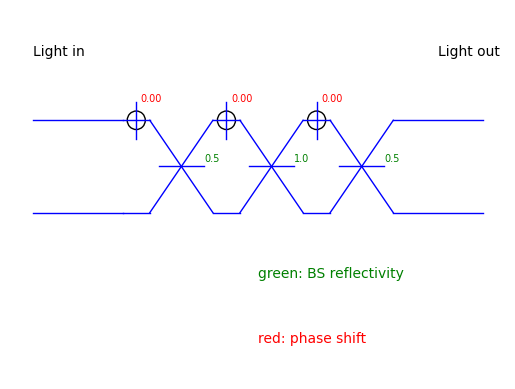

In [24]:
# Mach-Zender interferometer
# Usage: Beamsplitter(mode1, mode2, theta, phi)
theta = 0
fifty = itf.Beamsplitter(1, 2, np.pi/4, 0) # 50/50 beamsplitter
waveplate = itf.Beamsplitter(1, 2, 0, theta)

I = itf.Interferometer()
for bs in [fifty, waveplate, fifty]:
    I.add_BS(bs)

I.draw()

In [25]:
# What does the unitary look like?
U = I.calculate_transformation()
print(U)

[[ 1.99673462e-16+0.j -1.00000000e+00+0.j]
 [ 1.00000000e+00+0.j  1.79380389e-16+0.j]]


In [ ]:
CNOT_circuit = direct_decomposition(U, 2)
print(CNOT_circuit.num_qubits)
print(CNOT_circuit.depth())

In [116]:
circuit = QuantumCircuit(4)
circuit.initialize("0100")
interferom = direct_decomposition(U, 2)
circuit.compose(interferom, qubits=list(range(4)), inplace=True)
circuit.measure_all()

In [117]:
print(interferom)

global phase: 5.1982
      ┌────────────────────────────┐         ┌────────────────────┐         »
q_0: ─┤ U3(0.918,-0.82578,-1.8604) ├──■──────┤ U3(2.2089,-π,-π/2) ├──────■──»
     ┌┴────────────────────────────┤┌─┴─┐┌───┴────────────────────┴───┐┌─┴─┐»
q_1: ┤ U3(0.44771,-2.1698,-1.7446) ├┤ X ├┤ U3(1.5716,0.42281,-1.5696) ├┤ X ├»
     └┬───────────────────────────┬┘└───┘└────────────────────────────┘└───┘»
q_2: ─┤ U3(0,0,0.533218797217207) ├─────────────────────────────────────────»
      └──────┬──────────────┬─────┘                                         »
q_3: ────────┤ U3(0,0,-π/8) ├───────────────────────────────────────────────»
             └──────────────┘                                               »
«     ┌─────────────────────────────┐                                       »
«q_0: ┤ U3(2.1914,-2.3563,0.078164) ├──■────────────────────────────────────»
«     └┬────────────────────────────┤  │                                    »
«q_1: ─┤ U3(1.9639,0.40358,-2.2023) ├──┼───

In [118]:
num_shots = 1e5
simulator = AerSimulator()
circuit = transpile(circuit, simulator)
result = simulator.run(circuit, shots=num_shots).result()
counts = result.get_counts(circuit)
print(counts)

{'0001': 50066, '0100': 49934}


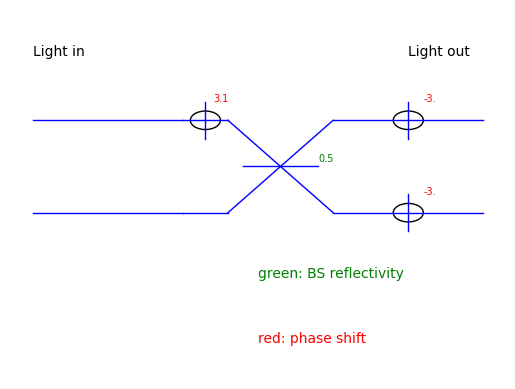

0.7853981633974483


In [134]:
r2 = 1/np.sqrt(2)
U = np.array([[r2, r2],[r2, -r2]])
I = itf.square_decomposition(U)
I.draw()
print(I.BS_list[0].theta)

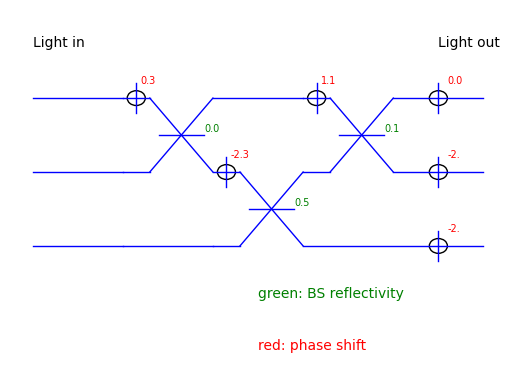

In [138]:
U = random_unitary(3)
I = itf.square_decomposition(U)
I.draw()

In [139]:
for bs in I.BS_list:
    print(bs)


 Beam splitter between modes 1 and 2: 
 Theta angle: 1.33 
 Phase: 0.33

 Beam splitter between modes 2 and 3: 
 Theta angle: 0.74 
 Phase: -2.32

 Beam splitter between modes 1 and 2: 
 Theta angle: 1.22 
 Phase: 1.14
